In [1]:
import gzip
import pickle
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

2021-12-19 17:33:49.721834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 17:33:49.721884: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
#Loading data

In [2]:
path = 'flatland_train.data'
X,y = pickle.load(gzip.open(path,'rb'))
y[y != 0] -= 2
X = X / 255.

In [3]:
X.shape

(10000, 50, 50)

In [5]:
y.shape

(10000,)

In [9]:
#test and train split 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#pasižiūrime, kiek kokių formų turime

In [7]:
Counter(y_train)

Counter({3.0: 1617, 1.0: 2147, 0.0: 1002, 4.0: 1340, 2.0: 1394})

In [14]:
#Neuro tinklas, uzsivadinti modeli ir densus

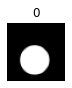

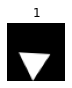

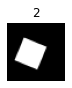

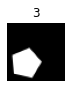

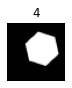

In [8]:
for i in range(5):
    idx = np.where(y_train==i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx], cmap = 'gray') 
    plt.axis('off')
    plt.title(i)
    plt.show()

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(50, 50)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'sgd', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 20)                50020     
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


2021-12-19 14:09:43.789973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-19 14:09:43.790117: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 14:09:43.790158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-trokas-2dai-5fprimer-2d2jufwo2q): /proc/driver/nvidia/version does not exist
2021-12-19 14:09:43.790589: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 2s 7ms/step - loss: 1.4975 - accuracy: 0.3958 - val_loss: 1.4252 - val_accuracy: 0.4627
Epoch 2/20
188/188 [==============================] - 1s 6ms/step - loss: 1.3723 - accuracy: 0.4545 - val_loss: 1.3397 - val_accuracy: 0.4547
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 1.2983 - accuracy: 0.4715 - val_loss: 1.2844 - val_accuracy: 0.4747
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 1.2469 - accuracy: 0.4840 - val_loss: 1.2407 - val_accuracy: 0.4853
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 1.2102 - accuracy: 0.4970 - val_loss: 1.2197 - val_accuracy: 0.4933
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 1.1843 - accuracy: 0.5045 - val_loss: 1.1932 - val_accuracy: 0.5087
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 1.1608 - accuracy: 0.5187 - val_loss: 1.1790 - val_accuracy: 0.5013
Epoch 

<AxesSubplot:>

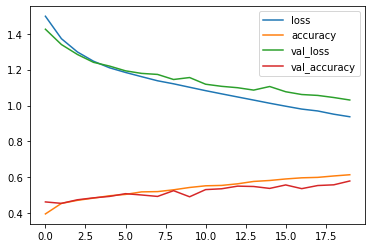

In [11]:
pd.DataFrame(loss.history).plot()

In [ ]:
#Naudojant sgd optimizerį, loss'ai krenta lėtai ir išlieka dideli, todėl pabandome nustatyti learning_rate

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(50, 50)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.SGD(learning_rate=0.01), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 20)                50020     
                                                                 
 dense_3 (Dense)             (None, 5)                 105       
                                                                 
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 1s 6ms/step - loss: 1.5087 - accuracy: 0.3423 - val_loss: 1.4320 - val_accuracy: 0.4127
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 1.3916 - accuracy: 0.4285 - val_loss: 1.3701 - val_accuracy: 0.4720
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 1.3198 - accuracy: 0.4640 - val_loss: 1.3140 - val_accuracy: 0.4593
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 1.2775 - accuracy: 0.4725 - val_loss: 1.2685 - val_accuracy: 0.4787
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 1.2455 - accuracy: 0.4802 - val_loss: 1.2488 - val_accuracy: 0.4920
Epoch 6/20
188/188 [==============================] - 1s 6ms/step - loss: 1.2199 - accuracy: 0.4908 - val_loss: 1.2282 - val_accuracy: 0.4800
Epoch 7/20
188/188 [==============================] - 1s 5ms/step - loss: 1.1998 - accuracy: 0.4977 - val_loss: 1.2267 - val_accuracy: 0.4593
Epoch 

<AxesSubplot:>

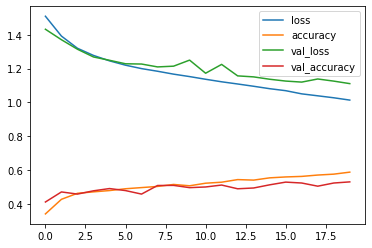

In [14]:
pd.DataFrame(loss.history).plot()

In [ ]:
#pabandžius kletą skirtingų learning rate'ų, vis tiek nepavyktą gauti gero rezultato, todėl bandome kitą optimizerį

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(50, 50)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(learning_rate=3e-4), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 20)                50020     
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


2021-12-19 17:34:17.631613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-19 17:34:17.631665: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 17:34:17.631692: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-trokas-2dai-5fprimer-2dzvl5lxu9): /proc/driver/nvidia/version does not exist
2021-12-19 17:34:17.632133: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 1.4396 - accuracy: 0.3873 - val_loss: 1.3429 - val_accuracy: 0.4547
Epoch 2/20
188/188 [==============================] - 1s 6ms/step - loss: 1.2810 - accuracy: 0.4803 - val_loss: 1.2523 - val_accuracy: 0.5013
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 1.2071 - accuracy: 0.5110 - val_loss: 1.1955 - val_accuracy: 0.5067
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 1.1495 - accuracy: 0.5298 - val_loss: 1.2071 - val_accuracy: 0.5120
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 1.1137 - accuracy: 0.5427 - val_loss: 1.1334 - val_accuracy: 0.5453
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 1.0722 - accuracy: 0.5612 - val_loss: 1.1124 - val_accuracy: 0.5433
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 1.0477 - accuracy: 0.5735 - val_loss: 1.1258 - val_accuracy: 0.5213
Epoch 

<AxesSubplot:>

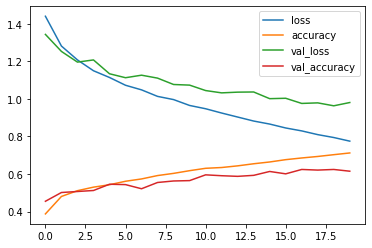

In [7]:
pd.DataFrame(loss.history).plot()

In [ ]:
#su Adam optimizeriu, val_loss daug mažiau šokinėja

In [ ]:
#pabandome sudaryti CNN modelį 

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(keras.layers.Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(learning_rate=3e-4), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)       

In [15]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 85s 454ms/step - loss: 0.2043 - accuracy: 0.9152 - val_loss: 0.4763 - val_accuracy: 0.8587
Epoch 2/20
188/188 [==============================] - 84s 449ms/step - loss: 0.1796 - accuracy: 0.9258 - val_loss: 0.5503 - val_accuracy: 0.8500
Epoch 3/20
188/188 [==============================] - 85s 452ms/step - loss: 0.1784 - accuracy: 0.9300 - val_loss: 0.4268 - val_accuracy: 0.8907
Epoch 4/20
188/188 [==============================] - 86s 455ms/step - loss: 0.1360 - accuracy: 0.9467 - val_loss: 0.6049 - val_accuracy: 0.8593
Epoch 5/20
188/188 [==============================] - 85s 452ms/step - loss: 0.1412 - accuracy: 0.9443 - val_loss: 0.4619 - val_accuracy: 0.8860
Epoch 6/20
188/188 [==============================] - 87s 462ms/step - loss: 0.1220 - accuracy: 0.9528 - val_loss: 0.8245 - val_accuracy: 0.7927
Epoch 7/20
188/188 [==============================] - 89s 475ms/step - loss: 0.1194 - accuracy: 0.9517 - val_loss: 1.5071 - val_ac

In [16]:
model.save('model.h5')

In [ ]:
testuojame modelį

In [17]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}', format((pred==y_test).mean()))

Accuracy on test set - {0:.02%} 0.9092


In [18]:
#gavome gera accuracy, tačiau labai ilgai treniruojasi moodelis